<a href="https://colab.research.google.com/github/snekumar/AD_cnn/blob/main/Alzheimers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('project')

Drive already mounted at project; to attempt to forcibly remount, call drive.mount("project", force_remount=True).


In [ ]:
import os
import cv2
import itertools
import numpy as np
import pandas as pd

In [ ]:
test_dir = "/content/project/MyDrive/project/Alzheimer_s Dataset/train/"
train_dir = "/content/project/MyDrive/project/Alzheimer_s Dataset/test/"

data = []

In [ ]:
for dirtrain in os.listdir(train_dir):
    print(dirtrain)
    for tr in os.listdir(train_dir + dirtrain):
        img = cv2.imread(train_dir + dirtrain + "/" + tr)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(32, 32, 1)

        data.append([img, dirtrain])

ModerateDemented
NonDemented
MildDemented
VeryMildDemented


In [ ]:
for dirtest in  os.listdir(test_dir):
    print(dirtest)
    for ts in os.listdir(test_dir + dirtest):
        img = cv2.imread(test_dir + dirtest + "/" + ts)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(32, 32, 1)

        data.append([img, dirtest])

ModerateDemented
VeryMildDemented
MildDemented
NonDemented


In [ ]:
import random
random.seed(20)

In [ ]:
random.shuffle(data)

In [ ]:
x, y = [], []
for e in data:
    x.append(e[0])
    y.append(e[1])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

x = np.array(x)
y = np.array(y)
y = y.reshape(y.shape[0],1)
enc = OneHotEncoder(handle_unknown='ignore').fit(y)
print(enc.categories_)
y = enc.transform(y).toarray()
print(f'Data   :   {str(x.shape)}')
print(f'Labels :   {str(y.shape)}')

[array(['MildDemented', 'ModerateDemented', 'NonDemented',
       'VeryMildDemented'], dtype='<U16')]
Data   :   (6396, 32, 32, 1)
Labels :   (6396, 4)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (4, 4), padding='same', activation=tf.nn.relu,
    input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)), Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    Dropout(0.3),

    tf.keras.layers.Conv2D(128, (2,2), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    Dropout(0.3),

    tf.keras.layers.Conv2D(256, (2,2), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 128)         0

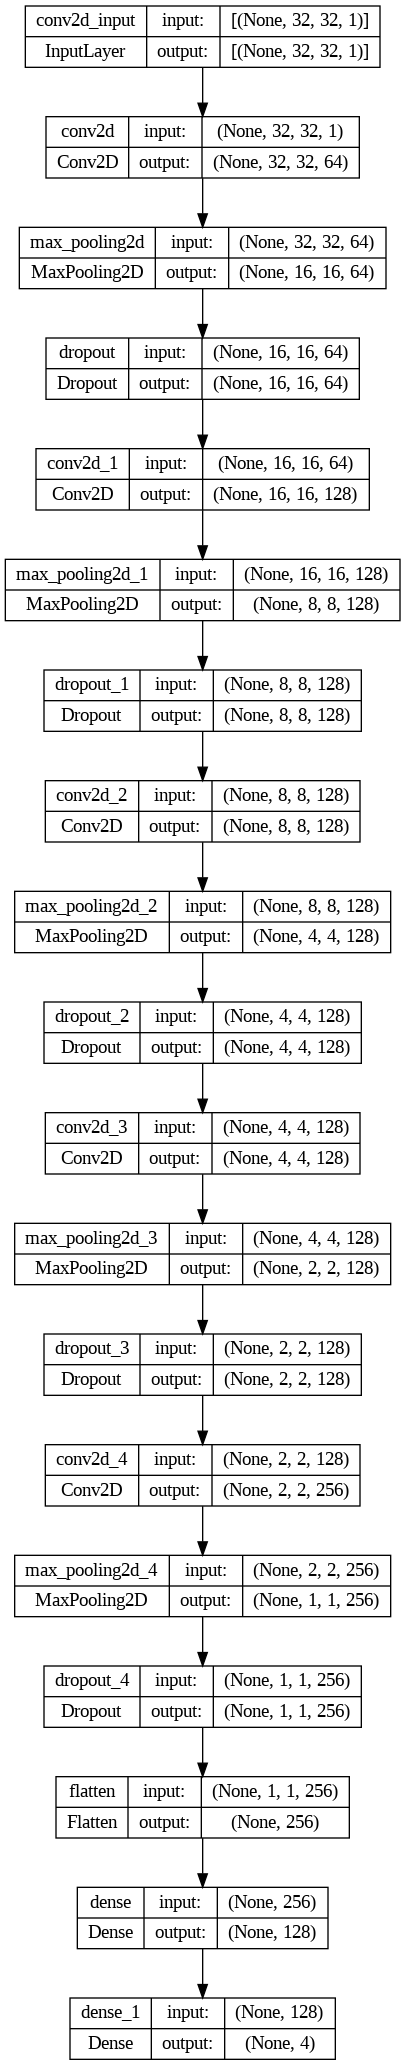

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=64,verbose=1,shuffle=True)

Epoch 1/200
64/64 [==============================] - 36s 536ms/step - loss: 1.9331 - accuracy: 0.4604 - val_loss: 1.1440 - val_accuracy: 0.5166
Epoch 2/200
64/64 [==============================] - 31s 475ms/step - loss: 1.0354 - accuracy: 0.4993 - val_loss: 1.1273 - val_accuracy: 0.5166
Epoch 3/200
64/64 [==============================] - 30s 471ms/step - loss: 0.9965 - accuracy: 0.5039 - val_loss: 0.9983 - val_accuracy: 0.5400
Epoch 4/200
64/64 [==============================] - 30s 467ms/step - loss: 0.9742 - accuracy: 0.5161 - val_loss: 0.9242 - val_accuracy: 0.5518
Epoch 5/200
64/64 [==============================] - 30s 470ms/step - loss: 0.9749 - accuracy: 0.5293 - val_loss: 1.0701 - val_accuracy: 0.5303
Epoch 6/200
64/64 [==============================] - 30s 471ms/step - loss: 0.9556 - accuracy: 0.5393 - val_loss: 0.9326 - val_accuracy: 0.5732
Epoch 7/200
64/64 [==============================] - 30s 472ms/step - loss: 0.9317 - accuracy: 0.5501 - val_loss: 1.0063 - val_accuracy:

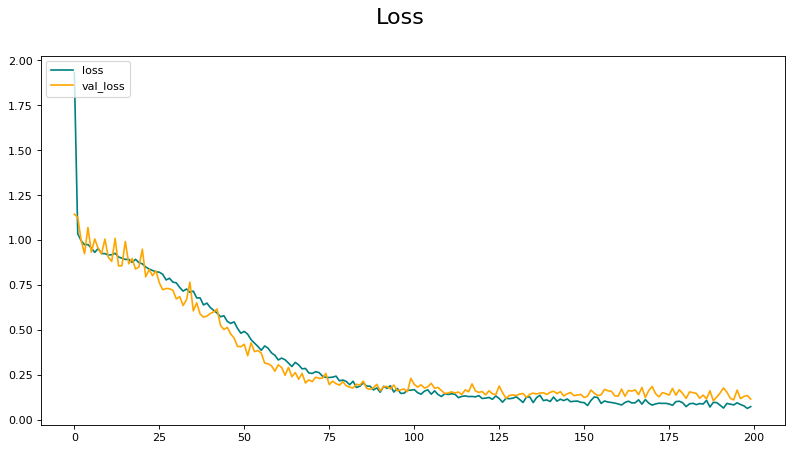

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(12, 6), dpi=80)
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

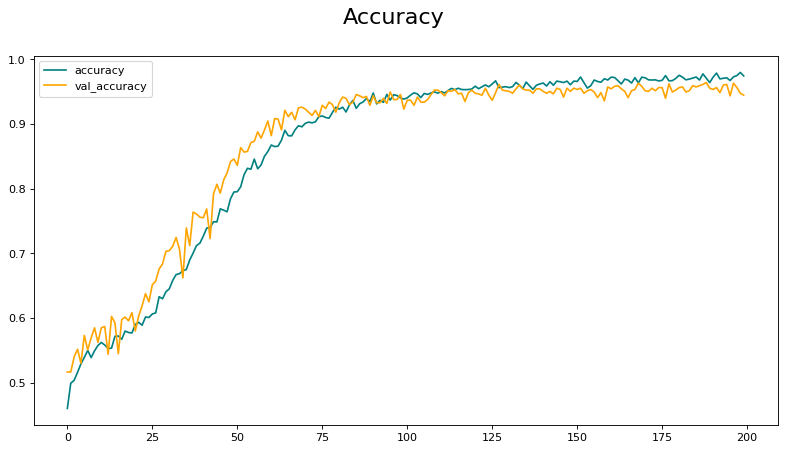

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=80)
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, verbose=2)
y_pred = model.predict(x_test).argmax(axis=1)
print(f'Test Loss     : {loss_and_metrics[0]}')
print(f'Test Accuracy : {loss_and_metrics[1]}')
print(y_test.shape, y_pred.shape)

40/40 - 2s - loss: 0.1134 - accuracy: 0.9539 - 2s/epoch - 46ms/step
40/40 [==============================] - 2s 44ms/step
Test Loss     : 0.11340256780385971
Test Accuracy : 0.953906238079071
(1280, 4) (1280,)


In [ ]:
from sklearn import metrics

df = pd.DataFrame(
  data = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred),
  columns = ['0', '1', '2', '3'],
  index = ['0', '1', '2', '3']
)
df

,0,1,2,3
0,179,0,2,8
1,0,6,0,0
2,1,0,613,17
3,4,0,27,423


<Axes: >

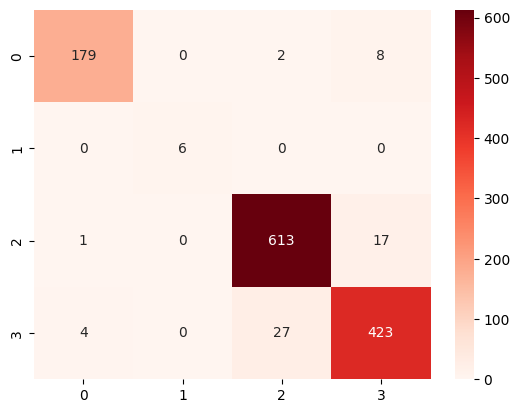

In [ ]:
import seaborn as sns

sns.heatmap(df, cmap="Reds", annot=True, fmt='.0f')